<a href="https://colab.research.google.com/github/rhamiro94/AnalisisYCuracion/blob/master/Entregable_Parte_2_grupo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn
seaborn.set_context('talk')

In [ ]:
# Apertura del dataset desde Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def connect_to_drive():
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  return GoogleDrive(gauth)

def read_csv_from_drive(drive, id, filename):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(filename)  
  return pd.read_csv(filename)

drive = connect_to_drive()  # utilización de la función de apertura de archivos desde drive
df = read_csv_from_drive(drive, '14QsR0CbiXi1BNbZKpuU7XmTvoA7nQChg', 'melb_df_csv.csv') # el 2° parámetro es el id del archivo (terminación del link en drive)


In [ ]:
df.head()

,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,YearBuilt,CouncilArea,Regionname,price mean
0,Abbotsford,2,h,1480000.0,2016-03-12,2.5,3067,1,1.0,NaN,Yarra,Northern Metropolitan,130.624031
1,Abbotsford,2,h,1035000.0,2016-04-02,2.5,3067,1,0.0,1900-01-01,Yarra,Northern Metropolitan,130.624031
2,Abbotsford,3,h,1465000.0,2017-04-03,2.5,3067,2,0.0,1900-01-01,Yarra,Northern Metropolitan,130.624031
3,Abbotsford,3,h,850000.0,2017-04-03,2.5,3067,2,1.0,NaN,Yarra,Northern Metropolitan,130.624031
4,Abbotsford,4,h,1600000.0,2016-04-06,2.5,3067,1,2.0,2014-01-01,Yarra,Northern Metropolitan,130.624031



A fines de organizar esta sección de la forma mas clara posible, se colocarán las consignas e inmediatamente debajo de ellas el desarrollo correspondiente. 

## Ejercicio 1 : Encodings


### 1.1 Consigna 1

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto BuildingArea y YearBuilt, que volveremos a imputar más adelante.

In [ ]:
#Filtramos nuestro data frame de aquellas variables indicadas en la consigna
filtered_df=df[df.columns.difference(['YearBuilt','BuildingArea'])]
filtered_df

,Bathroom,Car,CouncilArea,Date,Distance,Postcode,Price,Regionname,Rooms,Suburb,Type,price mean
0,1,1.0,Yarra,2016-03-12,2.5,3067,1480000.0,Northern Metropolitan,2,Abbotsford,h,130.624031
1,1,0.0,Yarra,2016-04-02,2.5,3067,1035000.0,Northern Metropolitan,2,Abbotsford,h,130.624031
2,2,0.0,Yarra,2017-04-03,2.5,3067,1465000.0,Northern Metropolitan,3,Abbotsford,h,130.624031
3,2,1.0,Yarra,2017-04-03,2.5,3067,850000.0,Northern Metropolitan,3,Abbotsford,h,130.624031
4,1,2.0,Yarra,2016-04-06,2.5,3067,1600000.0,Northern Metropolitan,4,Abbotsford,h,130.624031
...,...,...,...,...,...,...,...,...,...,...,...,...
13301,2,2.0,Yarra Ranges,2017-08-26,16.7,3150,1245000.0,South-Eastern Metropolitan,4,Otro,h,127.808511
13302,2,2.0,Hobsons Bay,2017-08-26,6.8,3016,1031000.0,Western Metropolitan,3,Williamstown,h,131.307595
13303,2,4.0,Hobsons Bay,2017-08-26,6.8,3016,1170000.0,Western Metropolitan,3,Williamstown,h,131.307595
13304,1,5.0,Hobsons Bay,2017-08-26,6.8,3016,2500000.0,Western Metropolitan,4,Williamstown,h,131.307595


### 1.2 Consigna 2

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

In [ ]:
#Utilizamos sickit learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

In [ ]:
##Definimos las columnas sobre las que aplicaremos el OHE
col_features=filtered_df.select_dtypes(include = ["object", "category","float","int"]).columns
col_features
#Transformamos en diccionario para poder aplicar el encoding a nuestras columnas.
feature_dicc = list(filtered_df[col_features].T.to_dict().values())

In [ ]:
##Implementamos el transformador DictVectorizer 
vec = DictVectorizer()
##Aplicamos el método  DictVectorizer a nuestro a nuestro dicc
matriz_OH = vec.fit_transform(feature_dicc)

In [ ]:
##Obtenemos nuestra matriz esparsa.
matriz_OH

<13306x200 sparse matrix of type '<class 'numpy.float64'>'
	with 159672 stored elements in Compressed Sparse Row format>

##Ejercicio 2: Imputación por KNN
En el teórico se presentó el método IterativeImputer para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.



### 2.1 Consigna 1

1.Agregue a la matriz obtenida en el punto anterior las columnas YearBuilt y BuildingArea.

In [ ]:
#Paso de Matriz Dispersa a DF
import scipy.sparse
df_sparse = pd.DataFrame.sparse.from_spmatrix(matriz_OH)

In [ ]:
df_sparse

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031
3,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031
4,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,127.808511
13302,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,131.307595
13303,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,131.307595
13304,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,131.307595


In [ ]:
##Hacemos una copia de nuestra base original: melb_df
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
df_merge_copia=melb_df.copy(deep=True)
##Agregamos la columna BuildingArea y YearBuilt
df_sparse[200]=df_merge_copia[["BuildingArea"]]
df_sparse[201]=df_merge_copia[["YearBuilt"]]

In [ ]:
df_sparse

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031,79.0,1900.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031,150.0,1900.0
3,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031,NaN,NaN
4,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,127.808511,NaN,NaN
13302,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,131.307595,208.0,2000.0
13303,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,131.307595,192.0,2000.0
13304,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,131.307595,116.0,1980.0


### 2.2 Consigna 2

2. Aplique una instancia de IterativeImputer con un estimador KNeighborsRegressor para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?

Previo a la imputación KNN para las variables BuildingArea (200) y YearBuilt (201) se realizó un escalado del tipo "MinMaxScaler" sobre las mismas. 

In [ ]:
##Vamos a realiar una imputación KNN para imputar los valores de las variables.
##Previamente realizaremos un escalado 
##Llamamos a nuestras librerías
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import Normalizer

In [ ]:
df_sparse[[200,201]]=MinMaxScaler().fit_transform(df_sparse[[200,201]])
df_sparse

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031,0.001775,0.856448
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031,0.003370,0.856448
3,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031,NaN,NaN
4,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130.624031,0.003190,0.995134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,127.808511,NaN,NaN
13302,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,131.307595,0.004673,0.978102
13303,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,131.307595,0.004313,0.978102
13304,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,131.307595,0.002606,0.953771


In [ ]:
##Realizamos la imputación KNN
##Llamamos a nuestras librerías.
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

In [ ]:
##Definimos nuestra funcion de imputación
df_sparse_imp = df_sparse.copy(deep=True)
knn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
##Aplcamos la función a nuestras variables)
df_sparse_imp[[200,201]] = knn_imputer.fit_transform(
    df_sparse[[200,201]])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


### 2.3 Consigna 3

3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

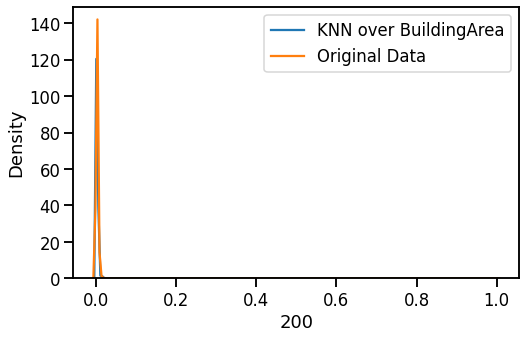

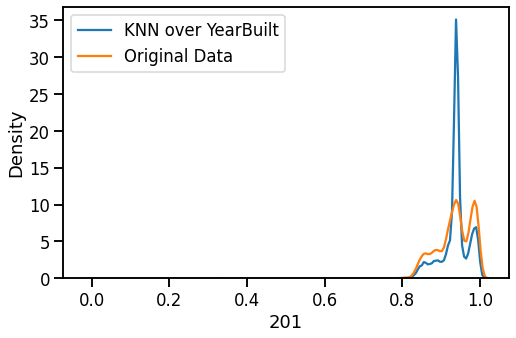

In [ ]:
fig = plt.figure(figsize=(8, 5))
seaborn.kdeplot(data=df_sparse_imp[200],label = 'KNN over BuildingArea')
seaborn.kdeplot(data=df_sparse[200],label = 'Original Data')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 5))
seaborn.kdeplot(data=df_sparse_imp[201],label = 'KNN over YearBuilt')
seaborn.kdeplot(data=df_sparse[201],label = 'Original Data')
plt.legend()
plt.show()

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:

2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

### 3.1 Consigna 1 

Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?

In [ ]:
#from sklearn.preprocessing import StandardScaler
scaler=MinMaxScaler()

df_sparse_imp=scaler.fit_transform(df_sparse_imp)

In [ ]:
from sklearn.decomposition import PCA

n = min(20, df_sparse_imp.shape[0])
pca = PCA(n_components = n).fit(df_sparse_imp)

In [ ]:
pca

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### 3.2 Consigna 2

Grafique la varianza capturada por los primeros  n  componentes principales, para cada  n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


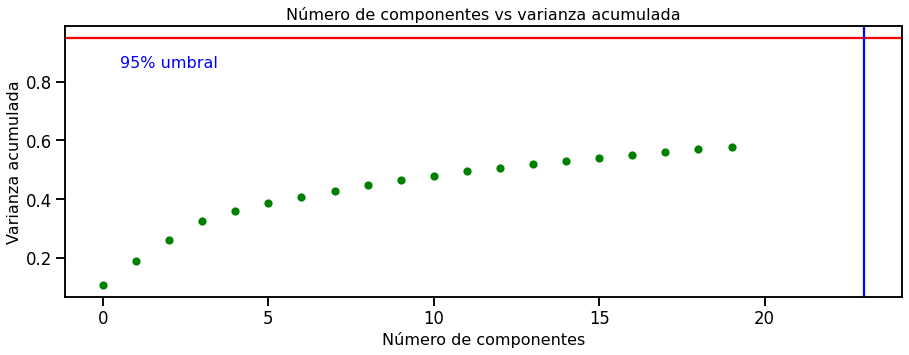

In [ ]:
y = np.cumsum(pca.explained_variance_ratio_) #acumulado
x = np.arange(0, len(y), step=1)

plt.figure(figsize=(15,5))
seaborn.scatterplot(x, y, linestyle='-', color='g')

plt.xlabel('Número de componentes',fontsize=16)
plt.ylabel('Varianza acumulada',fontsize=16)
plt.title('Número de componentes vs varianza acumulada',fontsize=16)

plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=23, color='b', linestyle='-')
plt.text(0.5, 0.85, '95% umbral', color = 'b', fontsize=16)

plt.show()

### 3.3 Consigna 3

En base al gráfico, seleccione las primeras  m  columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

Se seleccionan las primeras 5 columnas de la matriz obtenida luego de aplicar pca ya que son las que más explican la varianza acumulada. A partir de allí la varianza que explican las sucesivas columnas es cada vez menor. 

In [ ]:
proyected_features = pca.transform(df_sparse_imp)

In [ ]:
proyected_features

array([[-0.40563457,  0.70641408, -0.40989913, ..., -0.03116938,
         0.10344375, -0.05585415],
       [-0.40127414,  0.73733872, -0.38030782, ..., -0.08884142,
         0.1456436 , -0.04469502],
       [-0.42516579,  0.68545932, -0.42171787, ...,  0.04052965,
         0.03651971, -0.07906245],
       ...,
       [-0.50071852, -0.33340447, -0.47482173, ..., -0.16034231,
        -0.53605812, -0.26541007],
       [-0.53498352, -0.39376996, -0.52809579, ..., -0.09292584,
        -0.60088448, -0.27611219],
       [-0.49248143, -0.30258872, -0.49856597, ...,  0.09243899,
        -0.11549841,  0.00240076]])

In [ ]:
proyected_features_df = pd.DataFrame(data = proyected_features)
df_sparse_imp = pd.DataFrame(data = df_sparse_imp)

In [ ]:
name = []
for i in range(1,21):
  nombre = "pca" + str(i)
  name.append(nombre)

proyected_features_df.columns = name

In [ ]:
proyected_features_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20
0,-0.405635,0.706414,-0.409899,-0.343516,-0.065814,-0.183896,0.047086,0.023298,0.349327,0.665998,-0.481720,-0.113360,0.102010,-0.056756,0.013482,0.101330,-0.001813,-0.031169,0.103444,-0.055854
1,-0.401274,0.737339,-0.380308,-0.321626,-0.071633,-0.194257,0.045049,0.006556,0.351381,0.685982,-0.498685,-0.111805,0.093558,-0.031216,-0.047092,0.110420,0.010906,-0.088841,0.145644,-0.044695
2,-0.425166,0.685459,-0.421718,-0.355437,-0.055920,-0.151503,0.053407,0.039592,0.401481,0.684937,-0.485786,-0.130214,0.111521,-0.068080,0.066051,0.064083,-0.040619,0.040530,0.036520,-0.079062
3,-0.434965,0.690316,-0.406437,-0.342587,-0.055053,-0.141378,0.051925,0.029458,0.374895,0.646548,-0.478065,-0.134081,0.133678,-0.050460,0.090803,0.083294,-0.047245,0.043178,0.042315,-0.099308
4,-0.469348,0.639735,-0.434251,-0.380848,-0.054354,-0.131817,0.059025,0.049724,0.361111,0.599039,-0.484036,-0.150171,0.129320,-0.049445,0.153933,0.065724,-0.064662,0.067020,0.005105,-0.070870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,-0.684074,-0.473541,0.520608,-0.231173,-0.169841,0.000040,-0.018626,-0.093051,0.042558,-0.017929,0.132037,-0.027506,1.024357,-0.057640,0.128417,0.282049,0.309799,-0.288160,-0.324049,0.531717
13302,-0.475862,-0.299927,-0.462282,0.758774,-0.083001,-0.056379,-0.018024,-0.015994,-0.215069,0.146196,0.000242,0.026135,0.306954,0.515006,0.281194,-0.402084,-0.422170,-0.221221,-0.486676,-0.229276
13303,-0.500719,-0.333404,-0.474822,0.741531,-0.077005,-0.027599,-0.009527,-0.001667,-0.229855,0.090418,0.016514,0.006290,0.342551,0.520865,0.380916,-0.396880,-0.446912,-0.160342,-0.536058,-0.265410
13304,-0.534984,-0.393770,-0.528096,0.689925,-0.071847,-0.017811,0.000180,0.032335,-0.214739,0.068107,0.025043,-0.012306,0.351796,0.508275,0.468464,-0.415228,-0.462816,-0.092926,-0.600884,-0.276112


In [ ]:
df_sparse_imp['pca1'] = proyected_features_df['pca1']
df_sparse_imp['pca2'] = proyected_features_df['pca2']
df_sparse_imp['pca3'] = proyected_features_df['pca3']
df_sparse_imp['pca4'] = proyected_features_df['pca4']
df_sparse_imp['pca5'] = proyected_features_df['pca5']

In [ ]:
df_sparse_imp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,pca1,pca2,pca3,pca4,pca5
0,0.25,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333359,0.002965,0.938929,-0.405635,0.706414,-0.409899,-0.343516,-0.065814
1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333359,0.001775,0.856448,-0.401274,0.737339,-0.380308,-0.321626,-0.071633
2,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333359,0.003370,0.856448,-0.425166,0.685459,-0.421718,-0.355437,-0.055920
3,0.50,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333359,0.002965,0.938929,-0.434965,0.690316,-0.406437,-0.342587,-0.055053
4,0.25,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333359,0.003190,0.995134,-0.469348,0.639735,-0.434251,-0.380848,-0.054354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,0.50,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.311074,0.002965,0.938929,-0.684074,-0.473541,0.520608,-0.231173,-0.169841
13302,0.50,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.338770,0.004673,0.978102,-0.475862,-0.299927,-0.462282,0.758774,-0.083001
13303,0.50,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.338770,0.004313,0.978102,-0.500719,-0.333404,-0.474822,0.741531,-0.077005
13304,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.338770,0.002606,0.953771,-0.534984,-0.393770,-0.528096,0.689925,-0.071847


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
# Transformamos los datos procesados e imputados en un dataframe, junto a los nombres de las columnas: 
col_names = list(vec.get_feature_names())
col_names.append("BuildingArea")
col_names.append("YearBuilt")
col_names.append("pca1")
col_names.append("pca2")
col_names.append("pca3")
col_names.append("pca4")
col_names.append("pca5")

In [ ]:
df_datos_proc = df_sparse_imp.copy()
df_datos_proc.columns = col_names
df_datos_proc

,Bathroom,Car,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,CouncilArea=Glen Eira,CouncilArea=Greater Dandenong,CouncilArea=Hobsons Bay,CouncilArea=Hume,CouncilArea=Kingston,CouncilArea=Knox,CouncilArea=Macedon Ranges,CouncilArea=Manningham,CouncilArea=Maribyrnong,CouncilArea=Maroondah,CouncilArea=Melbourne,CouncilArea=Melton,CouncilArea=Monash,CouncilArea=Moonee Valley,CouncilArea=Moorabool,CouncilArea=Moreland,CouncilArea=Nillumbik,CouncilArea=Port Phillip,CouncilArea=Stonnington,CouncilArea=Unavailable,CouncilArea=Whitehorse,CouncilArea=Whittlesea,CouncilArea=Wyndham,CouncilArea=Yarra,CouncilArea=Yarra Ranges,Date=2016-01-28,Date=2016-03-09,Date=2016-03-12,Date=2016-04-02,Date=2016-04-06,...,Suburb=Oak Park,Suburb=Oakleigh South,Suburb=Ormond,Suburb=Otro,Suburb=Pascoe Vale,Suburb=Port Melbourne,Suburb=Prahran,Suburb=Preston,Suburb=Reservoir,Suburb=Richmond,Suburb=Rosanna,Suburb=Seddon,Suburb=South Melbourne,Suburb=South Yarra,Suburb=St Kilda,Suburb=Strathmore,Suburb=Sunshine,Suburb=Sunshine North,Suburb=Sunshine West,Suburb=Surrey Hills,Suburb=Templestowe Lower,Suburb=Thornbury,Suburb=Toorak,Suburb=Watsonia,Suburb=Werribee,Suburb=West Footscray,Suburb=Williamstown,Suburb=Windsor,Suburb=Yarraville,Type=h,Type=t,Type=u,price mean,BuildingArea,YearBuilt,pca1,pca2,pca3,pca4,pca5
0,0.25,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333359,0.002965,0.938929,-0.405635,0.706414,-0.409899,-0.343516,-0.065814
1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333359,0.001775,0.856448,-0.401274,0.737339,-0.380308,-0.321626,-0.071633
2,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333359,0.003370,0.856448,-0.425166,0.685459,-0.421718,-0.355437,-0.055920
3,0.50,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333359,0.002965,0.938929,-0.434965,0.690316,-0.406437,-0.342587,-0.055053
4,0.25,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333359,0.003190,0.995134,-0.469348,0.639735,-0.434251,-0.380848,-0.054354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,0.50,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.311074,0.002965,0.938929,-0.684074,-0.473541,0.520608,-0.231173,-0.169841
13302,0.50,0.4,0.0,0.0,0

## Ejercicio 5: Documentación

Se realiza en pdf "Ejercicio 5: Documentación". 